<a href="https://colab.research.google.com/github/aliya-fatma011/Machine-Learning/blob/main/knn_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl

In [ ]:
import yfinance as yf

data = yf.download("TATASTEEL.NS", start="2020-01-01", end="2024-01-01")
print(data.head())



/tmp/ipython-input-2341192522.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TATASTEEL.NS", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker     TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS TATASTEEL.NS
Date                                                                       
2020-01-01    39.250175    39.984412    39.002631    39.690715    121005300
2020-01-02    40.685085    40.932626    39.606807    39.606807    216749610
2020-01-03    40.588577    40.798359    40.231949    40.529839    129568630
2020-01-06    39.711693    40.278103    39.485128    40.278103     96016080
2020-01-07    39.950840    40.664097    39.736862    39.900491    131957880


In [ ]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2020-01-01,39.250175,39.984412,39.002631,39.690715,121005300
2020-01-02,40.685085,40.932626,39.606807,39.606807,216749610
2020-01-03,40.588577,40.798359,40.231949,40.529839,129568630
2020-01-06,39.711693,40.278103,39.485128,40.278103,96016080
2020-01-07,39.950840,40.664097,39.736862,39.900491,131957880
2020-01-08,39.879520,40.122865,39.187240,39.577434,133048410
2020-01-09,40.542431,40.781582,40.202585,40.697671,101311520
2020-01-10,40.798359,41.440291,40.278101,40.739620,159276340


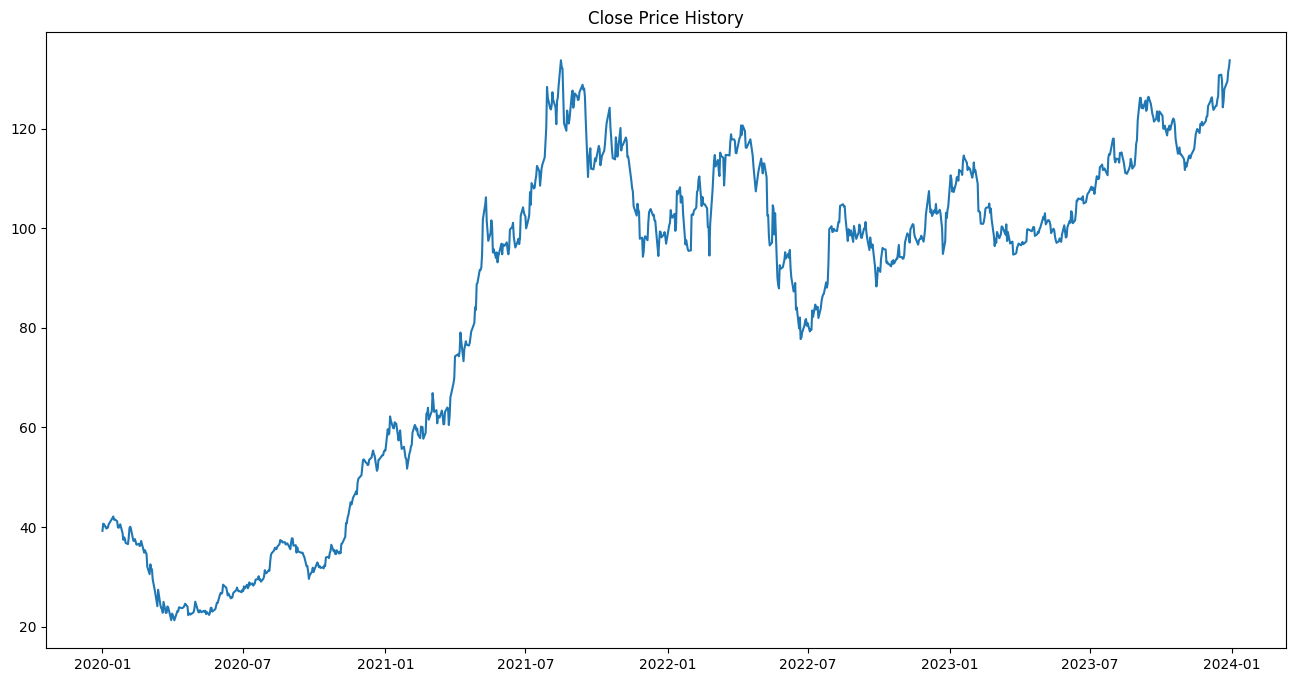

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])

#classification problem buy(+1) or sell(-1) the stock#

In [ ]:
data['open-close'] = data['Open'] - data['Close']
data['high-low'] = data['High'] - data['Low']
data=data.dropna()


input features to predict wheather customer should buy and sell

In [ ]:
X=data[['open-close','high-low']]
X.head()

Price,open-close,high-low
Ticker,,
Date,,
2020-01-01,0.440540,0.981780
2020-01-02,-1.078278,1.325819
2020-01-03,-0.058739,0.566410
2020-01-06,0.566410,0.792975
2020-01-07,-0.050349,0.927235


intention is to store +1 for the buy signal and -1 for the sell signal.the target variable is "Y" for classification task

In [ ]:
Y=np.where(data['Close'].shift(-1) > data['Close'],1,-1)


In [ ]:
Y

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=44)
#

imputation of KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#fit the model
# Flatten Y_train for fitting to address DataConversionWarning
model.fit(X_train, Y_train.ravel())
#accuracy score
accuracy_train=accuracy_score(Y_train.ravel(),model.predict(X_train))
accuracy_test=accuracy_score(Y_test.ravel(),model.predict(X_test))
print("Train_data Accuracy: %.2f" %(accuracy_train))
print("Test_data Accuracy: %.2f"%(accuracy_test))

Train_data Accuracy: 0.67
Test_data Accuracy: 0.48


In [ ]:
prediction_classification=model.predict(X_test)


In [ ]:
actual_predicted_data=pd.DataFrame({'Actual Class':Y_test.ravel(),'Predicted Class':prediction_classification})

In [ ]:
actual_predicted_data.head()

,Actual Class,Predicted Class
0,-1,-1
1,1,-1
2,1,-1
3,1,-1
4,1,1


regression problem :KNN

In [ ]:
y=data['Close']

In [ ]:
y

Ticker,TATASTEEL.NS
Date,
2020-01-01,39.250175
2020-01-02,40.685085
2020-01-03,40.588577
2020-01-06,39.711693
2020-01-07,39.950840
...,...
2023-12-22,127.929039
2023-12-26,129.509583
2023-12-27,131.425415


implenentation of KNN regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsRegressor()

# Initialize GridSearchCV for regression
model_reg=GridSearchCV(knn,params,cv=5)

# Fit the regression model
model_reg.fit(X_train_reg, y_train_reg.values.ravel())

# Make predictions using the fitted GridSearchCV object
predictions=model_reg.predict(X_test_reg)

print("Predictions made successfully!")

Predictions made successfully!


In [ ]:
print(predictions)

[ 73.04485461  40.19989319  93.77107887  83.65936877  94.54954427
  85.67071838  88.32682521  89.74987335  81.27440173  87.07553075
  53.13934975 102.74622803  96.36395162  96.51104863  99.74080404
  99.74111913  62.85134252  46.48507258  98.00957133  97.32934036
  86.48309733 108.01104329  42.32820091  82.45831998  34.17799937
  35.8405941   96.51104863  39.85265147  31.66478615  91.15423749
  47.97956149 107.62934621  51.25086072  87.74508235  76.86565793
 107.63260829  84.99855804  39.69976578  97.39326083  96.05619812
  91.70520083 103.28838094  95.0742569   46.6478686   87.4363589
  76.96554743  50.68321584 101.81427155  98.6198733   90.78097394
  92.98724874 104.82613932  49.73784053  62.96962357  86.31779277
  79.32794456 108.02323863  94.4879069   63.42789803  44.28087921
  64.9725942   72.12698771  52.349683    88.18726858 105.75841319
  56.88954557  76.95398051  90.34878693  87.77901433  97.79681079
 102.17707621 100.19849447  93.02513479 103.22170512  93.27083499
  81.181497

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(predictions)),2)))
rms

np.float64(40.59957727411551)

In [ ]:
valid=pd.DataFrame({'Actual Close':y_test_reg.values.ravel(),'predicted close value':predictions})

In [ ]:
valid.head(10)

,Actual Close,predicted close value
0,32.033684,73.044855
1,36.464275,40.199893
2,93.159851,93.771079
3,21.292852,83.659369
4,104.498055,94.549544
5,125.486351,85.670718
6,23.709538,88.326825
7,115.901573,89.749873
8,98.050995,81.274402
9,99.396065,87.075531


In [ ]:
valid.head()

,Actual Close,predicted close value
0,32.033684,73.044855
1,36.464275,40.199893
2,93.159851,93.771079
3,21.292852,83.659369
4,104.498055,94.549544
